### Arrangement Creation
##### In this notebook, I create an algorithm that tries to automate the creation of arrangements that maximize or minimize the disparity between all possible NN and optimal routes from each position in the arrangement. I will try to take cues from the GA to implement variation and finding valid solutions. 

In [2]:
import numpy as np
import random
import pandas as pd
from shapely.geometry import Point, Polygon
import matplotlib.pyplot as plt

Create the initial population of location dataframes with location identifiers and x,y pairs that can be handled by the TSP algorithms. The area of points is defined by a hexagon placed onto the unity terrain approximating an area where trees would be located. 

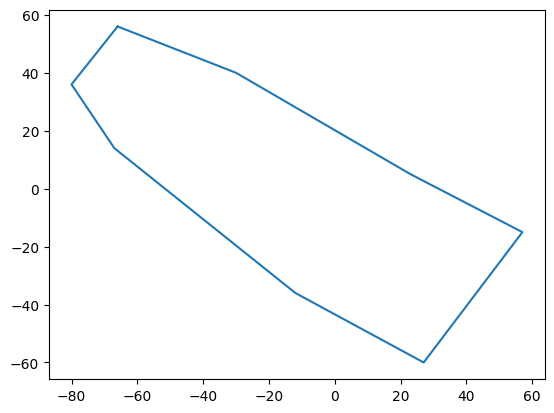

In [ ]:
# create polygon adjusted to level boundaries, will generate points here
# poly = Polygon([[-74, 46], [-67, 14], [-12, -36],
#                [35, -38], [23, 5], [-30, 40]])

poly = Polygon([
    [-66, 56], [-30, 40], [23, 5], [57, -15],
    [27, -60], [-12, -36], [-67, 14], [-80, 36]
])

# Plot the polygon
xp, yp = poly.exterior.xy
plt.plot(xp, yp)
plt.show()

Run the algorithm to find good arrangements to use to exaggerate the theoretical differences between TSP strategies. 

In [71]:
%run -i src/arr_ga_funs.py
final_pop_arrangements = arrangement_ga(
    n_population=70, polygon=poly, n_locations=8, n_generations=25,
    crossover_rate=.75, mutation_rate=.5
)

Random
Mean:  5709.2592270411205 
Stdev:  4097.261090368309 
GA Results
Mean:  89216.51557233519 
Stdev:  40546.21049100037
113211.20266232878


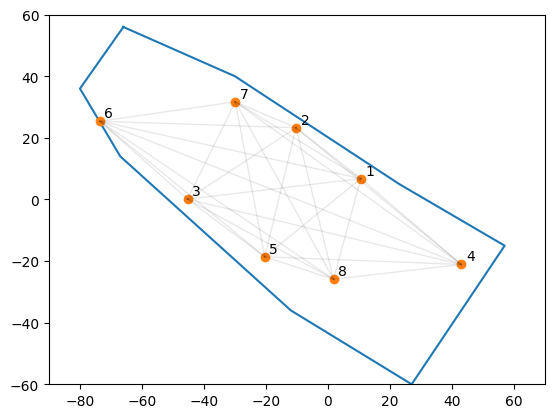

In [73]:
%run -i src/arr_ga_funs.py
best_deviation, best_deviation_score = arrangement_pop_summary(final_pop_arrangements)

plot_arrangement(polygon=poly, arrangement_df=best_deviation)
print(best_deviation_score)

4571.422720637354


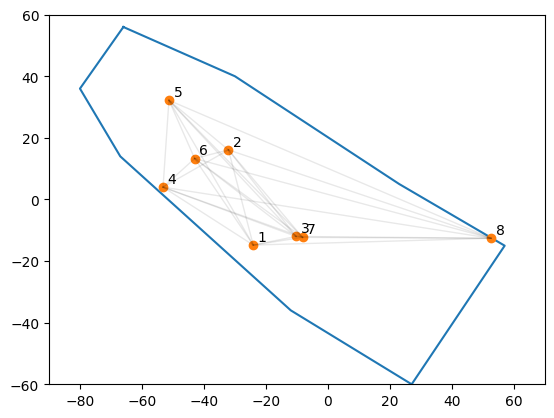

In [66]:
i = random.randint(0, 60)
arrangement_df = final_pop_arrangements[i]
plot_arrangement(polygon=poly, arrangement_df=arrangement_df)
print(find_deviation_score(arrangement_df))

In [74]:
# write to csv
best_deviation.to_csv("../arrangements/generated_nn_optimal8.csv")

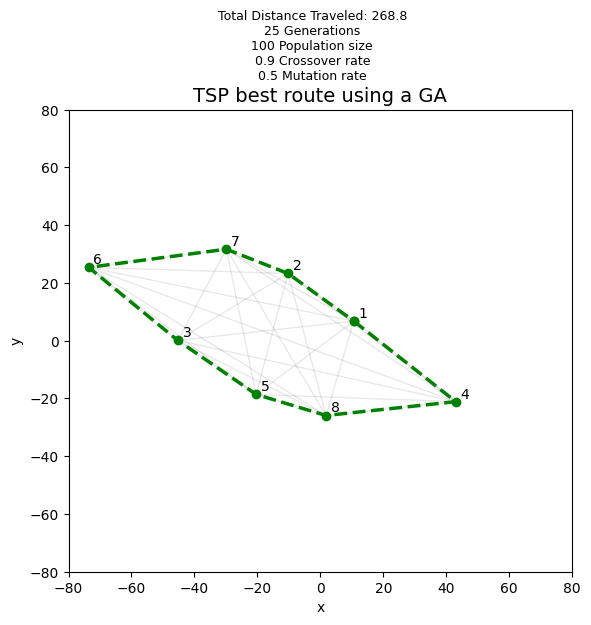

113211.20266232875


In [75]:
# check out this or previous dfs
arrangement_df = pd.read_csv("../arrangements/generated_nn_optimal8.csv")

%run -i src/nn_funs.py
%run -i src/ga_funs.py
dist_matrix = euclid_distance_matrix(arrangement_df)
ga_dict = run_all_ga(
    locations_df=arrangement_df,path_len=8,dist_matrix=dist_matrix,
    n_population=100, n_generations=25, crossover_rate=.9, mutation_rate=.5
)
plot_ga_path(1, ga_dict, arrangement_df)
print(find_deviation_score(arrangement_df))

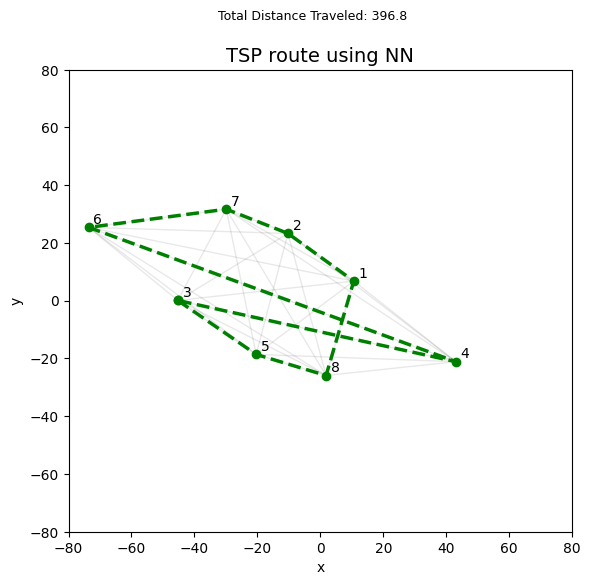

   start_locations                     paths   distances
0                1  [1, 2, 7, 3, 5, 8, 4, 6]  390.853296
1                2  [2, 7, 3, 5, 8, 1, 4, 6]  376.471852
2                3  [3, 5, 8, 1, 2, 7, 6, 4]  396.816383
3                4  [4, 8, 5, 3, 7, 2, 1, 6]  390.853296
4                5  [5, 8, 1, 2, 7, 3, 6, 4]  367.277610
5                6  [6, 3, 5, 8, 1, 2, 7, 4]  389.828036
6                7  [7, 2, 1, 8, 5, 3, 6, 4]  389.828036
7                8  [8, 5, 3, 7, 2, 1, 4, 6]  397.098571


In [77]:
# view nn paths
%run -i src/nn_funs.py
nn_dict = run_all_nn(arrangement_df, dist_matrix, 8)
plot_nn_path(3, nn_dict, arrangement_df)
print(pd.DataFrame(nn_dict))